Importing the Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

Read, prepare and split Data

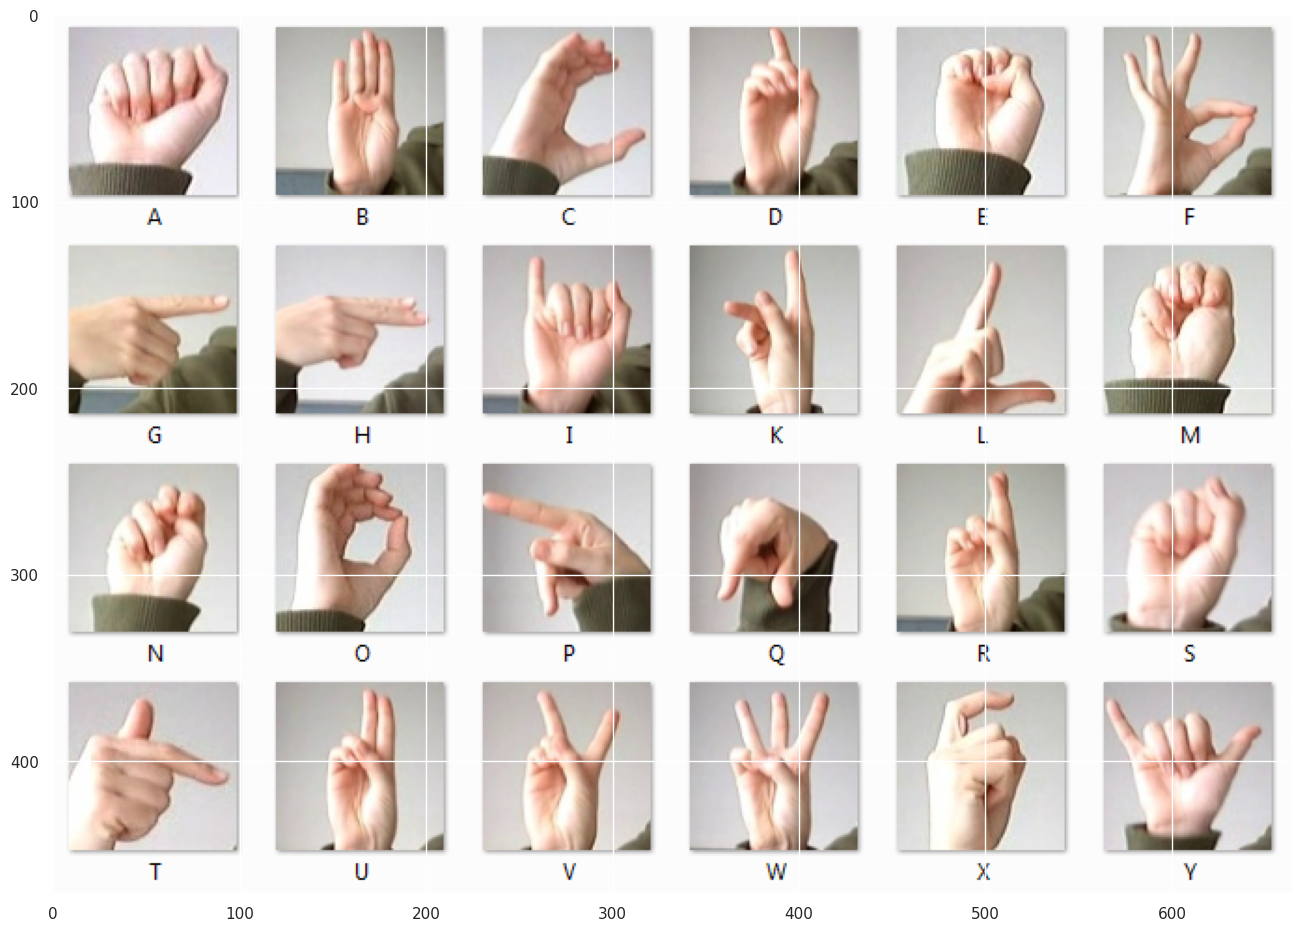

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('/content/amer_sign2.png')
plt.imshow(img)
plt.show()

In [56]:
df_train = pd.read_csv('/content/sign_mnist_train.csv')
df_train.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,11,162,164,167,171,175,179,181,183,185,...,138.0,137.0,135.0,135.0,135.0,134.0,135.0,149.0,205.0,228.0
2408,2,176,176,175,177,176,177,177,177,177,...,223.0,223.0,222.0,222.0,222.0,221.0,220.0,220.0,217.0,217.0
2409,24,160,161,164,165,167,166,166,167,167,...,205.0,205.0,203.0,202.0,201.0,199.0,196.0,195.0,194.0,192.0
2410,7,122,122,122,122,123,123,123,124,125,...,165.0,165.0,165.0,163.0,163.0,163.0,145.0,131.0,138.0,128.0


In [57]:
df_test = pd.read_csv('/content/sign_mnist_test.csv')
df_test.head(-5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,10,130,131,131,134,133,135,137,136,136,...,128,106,107,63,11,147,194,182,176,124
7163,4,158,161,165,169,172,175,177,179,181,...,78,122,141,141,141,140,141,142,143,144
7164,14,141,144,146,149,153,156,158,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,8,158,160,160,161,161,161,164,162,162,...,177,178,176,174,173,172,171,169,169,167


In [58]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,162,164,167,171,175,179,181,183,185,187,...,138.0,137.0,135.0,135.0,135.0,134.0,135.0,149.0,205.0,228.0
2408,176,176,175,177,176,177,177,177,177,175,...,223.0,223.0,222.0,222.0,222.0,221.0,220.0,220.0,217.0,217.0
2409,160,161,164,165,167,166,166,167,167,166,...,205.0,205.0,203.0,202.0,201.0,199.0,196.0,195.0,194.0,192.0
2410,122,122,122,122,123,123,123,124,125,124,...,165.0,165.0,165.0,163.0,163.0,163.0,145.0,131.0,138.0,128.0


In [59]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head(-5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,130,131,131,134,133,135,137,136,136,137,...,128,106,107,63,11,147,194,182,176,124
7163,158,161,165,169,172,175,177,179,181,184,...,78,122,141,141,141,140,141,142,143,144
7164,141,144,146,149,153,156,158,161,161,161,...,199,203,202,201,201,201,200,200,201,201
7165,158,160,160,161,161,161,164,162,162,161,...,177,178,176,174,173,172,171,169,169,167


In [60]:
size  = 28
channels = 1
batch = 128
epochs = 100

In [61]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2417, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


Data Augmentation

In [62]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

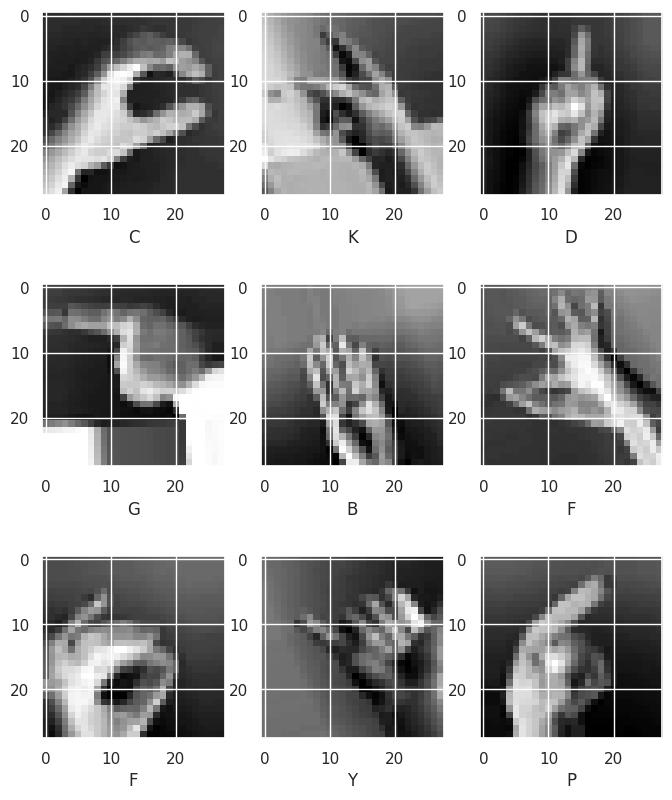

In [63]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(8, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gist_gray_r')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

In [64]:
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

Design The Neural Network

In [65]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),

                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),


                    Flatten(),

                    Dense(units=4096, activation="relu"),
                    Dropout(0.2),

                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),

                    Dense(units=256, activation="relu"),
                    Dropout(0.2),

                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)        

Evaluate the Model

In [66]:
score = Model.evaluate(X_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 12s 54ms/step - loss: 3.2179 - accuracy: 0.0305
Test loss: 3.2179360389709473
Test accuracy: 0.030535414814949036


In [67]:
df_test = pd.read_csv('/content/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

Confusion Matrix

In [68]:
y_pred = np.argmax(Model.predict(X_test),axis = 1)

225/225 [==============================] - 16s 70ms/step


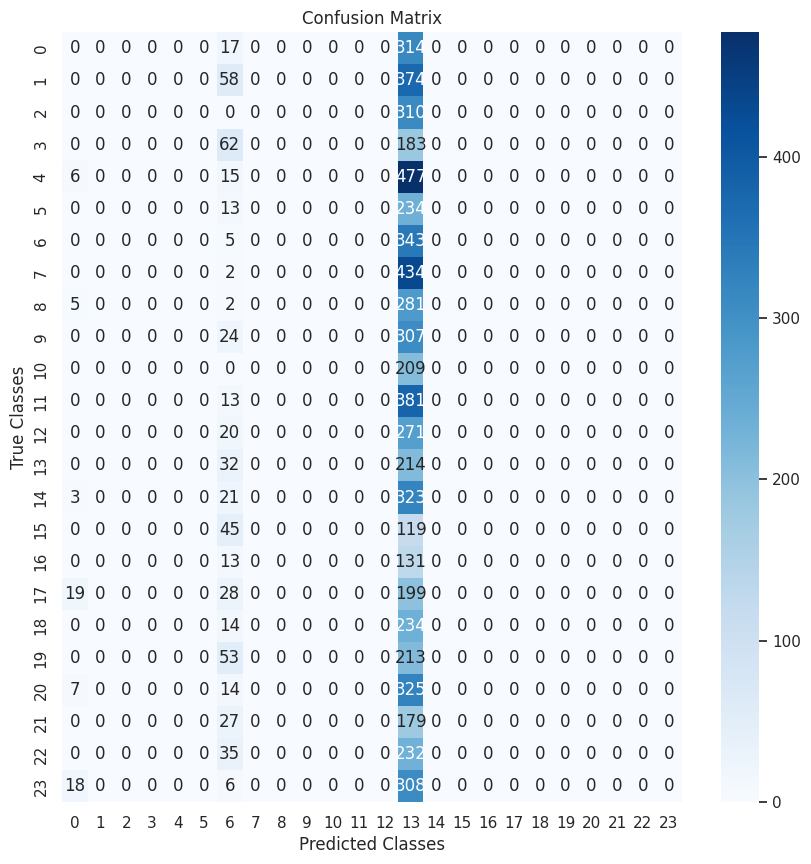

In [69]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

Testing the model

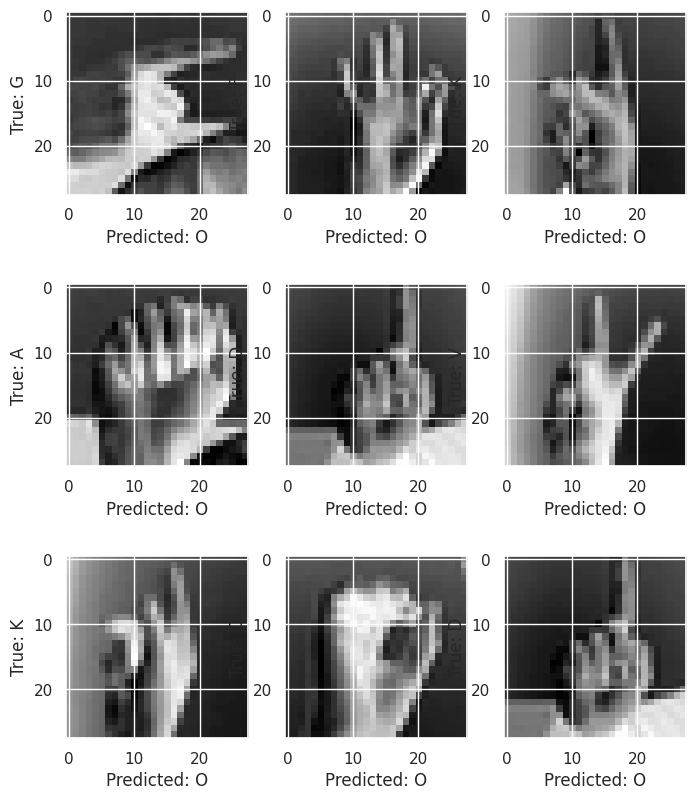

In [71]:
plt.figure(figsize=(8,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gist_gray_r')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")

plt.show()